In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#filtering warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report



In [2]:
bank = pd.read_excel('C:/Users/Administrator/Desktop/Visualization/Assignment1/bank.xlsx')
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank.shape

(41188, 21)

In [4]:
for col in bank.columns:
    print('{} unique element: {}'.format(col,bank[col].nunique()))

age unique element: 78
job unique element: 12
marital unique element: 4
education unique element: 8
default unique element: 3
housing unique element: 3
loan unique element: 3
contact unique element: 2
month unique element: 10
day_of_week unique element: 5
duration unique element: 1544
campaign unique element: 42
pdays unique element: 27
previous unique element: 8
poutcome unique element: 3
emp.var.rate unique element: 10
cons.price.idx unique element: 26
cons.conf.idx unique element: 26
euribor3m unique element: 316
nr.employed unique element: 11
y unique element: 2


In [6]:
bank['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [7]:
bank['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

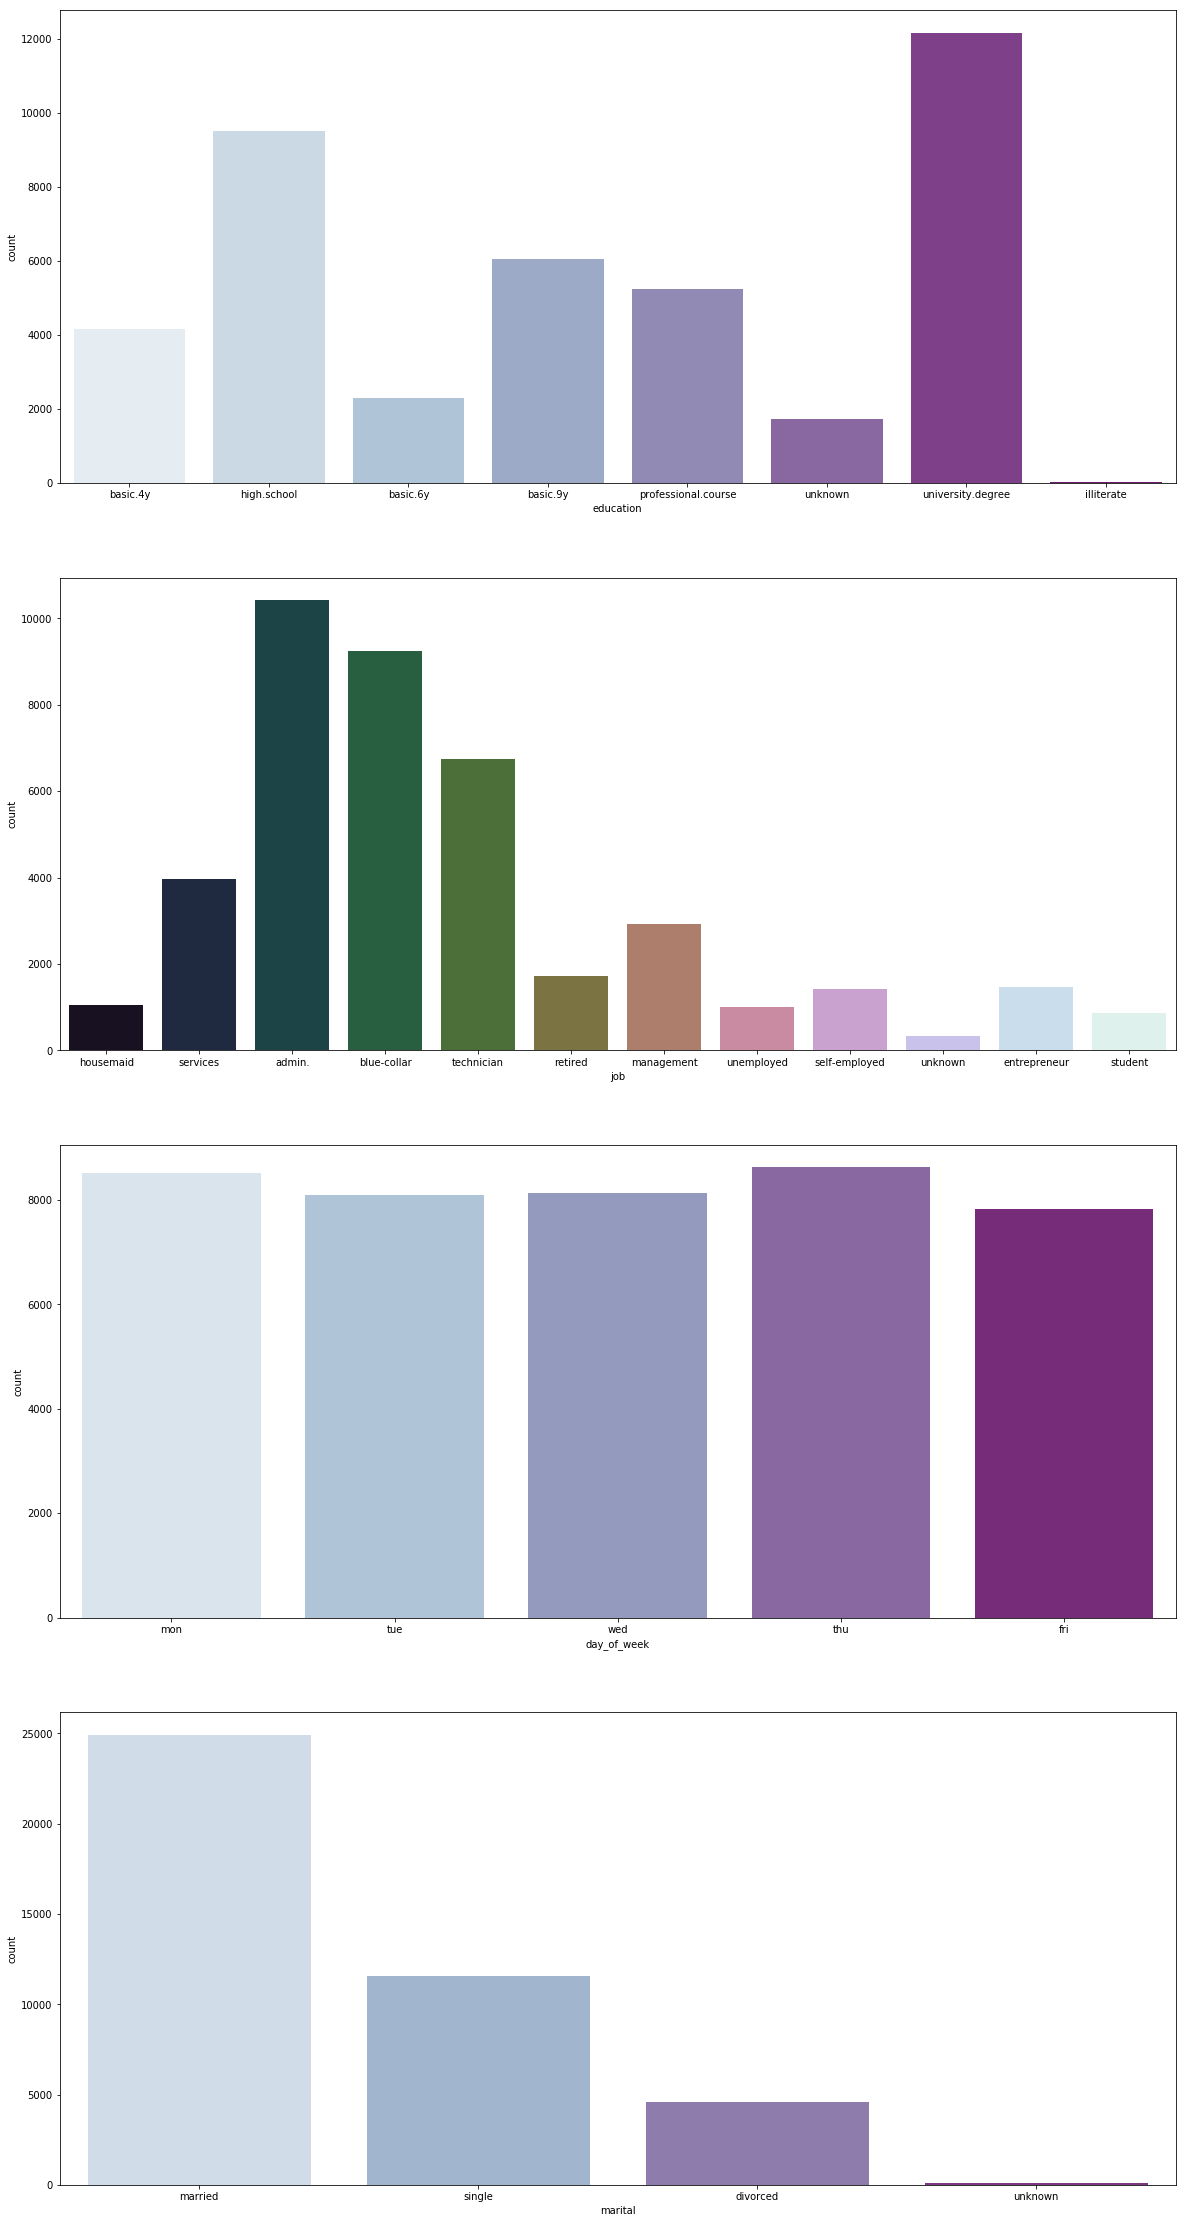

In [8]:
fig = plt.figure(figsize = (20,40))

plt.subplot(4,1,1)
sns.countplot(bank['education'], palette = 'BuPu')

plt.subplot(4,1,2)
sns.countplot(bank['job'], palette = 'cubehelix')

plt.subplot(4,1,3)
sns.countplot(bank['day_of_week'], palette = 'BuPu')

plt.subplot(4,1,4)
sns.countplot(bank['marital'], palette = 'BuPu')



plt.show()

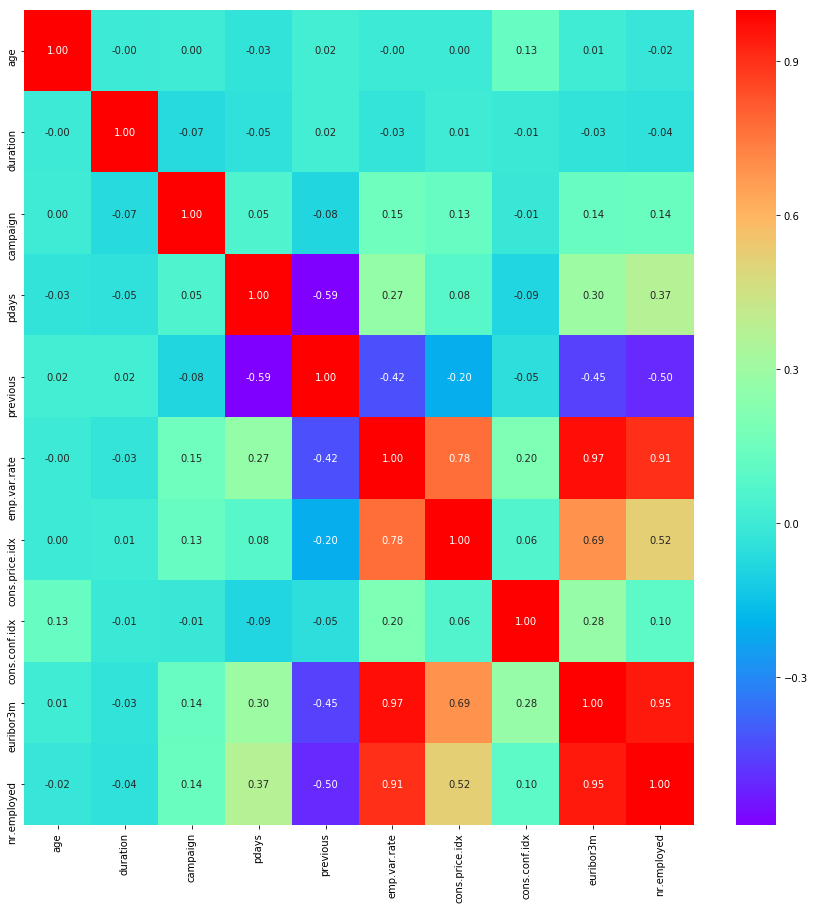

In [8]:
fig = plt.figure(figsize = (15,15))

corr = bank.corr()
sns.heatmap(corr, cmap='rainbow', annot=True, fmt=".2f")

In [9]:
bank.isnull().sum()/bank.shape[0]*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [10]:
bank['y'].value_counts() #imbalanced class

no     36548
yes     4640
Name: y, dtype: int64

In [11]:
bank_y = bank['y']
from sklearn import preprocessing
le       = preprocessing.LabelEncoder()
bank_op  = le.fit(bank_y)
#bank_op = le.classes_
bank_op  = le.transform(bank_y) 
#list(le.inverse_transform([2, 2, 1]))
bank_op

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
#going for a model

bank_x = bank.drop('y', axis = 1)
#bank_y = bank['y']
print(bank_x.shape, bank_y.shape)
bank_x_dummy = pd.get_dummies(bank_x)
print(bank_x_dummy.shape)

xtrain, xtest, ytrain, ytest =  train_test_split(bank_x_dummy, bank_op, test_size = 0.2,random_state = 0)
print(xtrain.shape, ytrain.shape, xtest.shape,ytest.shape)

(41188, 20) (41188,)
(41188, 63)
(32950, 63) (32950,) (8238, 63) (8238,)


In [14]:
model_dt = DecisionTreeClassifier()
model_dt.fit(xtrain,ytrain)

predict_dt = model_dt.predict(xtest)
                      

#predict_dt['Neg1'].value_counts()

accuracy_score(ytest, predict_dt) *100

89.17212915756252

In [15]:
model_rf = RandomForestClassifier(n_estimators = 300)
model_rf.fit(xtrain,ytrain)

predict_rf = model_rf.predict(xtest)
predict_rf

accuracy_score(ytest, predict_rf)*100

91.69701383831027

In [16]:
model_ada = AdaBoostClassifier()
model_ada.fit(xtrain,ytrain)

predict_ada = model_ada.predict(xtest)
predict_ada

accuracy_score(ytest, predict_ada)*100

91.41781985918912

In [17]:
model_lr = LogisticRegression()
model_lr.fit(xtrain,ytrain)

predict_lr = model_lr.predict(xtest)
predict_lr

accuracy_score(ytest, predict_lr)*100

91.53920854576354

In [18]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve


Random Forest AUC: 0.94
ADA BOOST AUC: 0.94
Decision Tree AUC: 0.93
Logistic Regression: 0.93


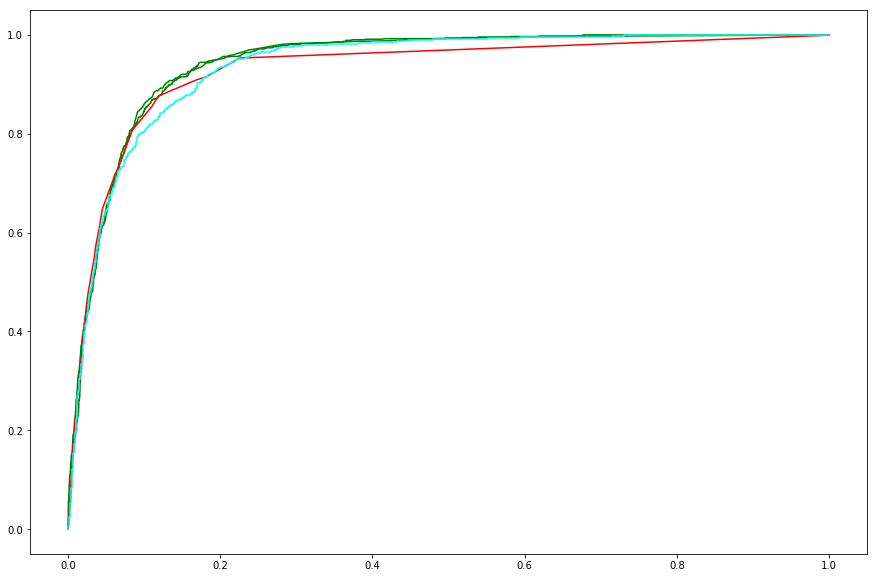

In [19]:
#using ROC
plt.figure(figsize=(15,10))

model1 = RandomForestClassifier(n_estimators=300)
model1.fit(xtrain,ytrain)
probs_1 = pd.DataFrame(model1.predict_proba(xtest),
                      columns=['Neg0', 'Pos1'])
fpr,tpr,cutoffs = roc_curve(ytest, probs_1['Pos1'])
plt.plot(fpr,tpr,color = 'green')
auc_rf= auc(fpr,tpr)
print('Random Forest AUC: %.2f' % auc_rf)

model2 = AdaBoostClassifier(random_state = 100)
model2.fit(xtrain,ytrain)
probs_2 = pd.DataFrame(model2.predict_proba(xtest),
                      columns=['Neg0' ,'Pos1'])
fpr,tpr,cutoffs = roc_curve(ytest, probs_2['Pos1'])
plt.plot(fpr,tpr,color = 'green')
auc_ada= auc(fpr,tpr)
print('ADA BOOST AUC: %.2f' % auc_ada)
model3 = DecisionTreeClassifier(random_state = 100, max_depth = 5)
model3.fit(xtrain,ytrain)
probs_3 = pd.DataFrame(model3.predict_proba(xtest),
                      columns=['Neg0', 'Pos1'])
fpr,tpr,cutoffs = roc_curve(ytest, probs_3['Pos1'])
plt.plot(fpr,tpr,color = 'red')
auc_dt= auc(fpr,tpr)
print('Decision Tree AUC: %.2f' % auc_dt)
model4 = LogisticRegression()
model4.fit(xtrain,ytrain)
probs_4 = pd.DataFrame(model4.predict_proba(xtest),
                      columns=['Neg0', 'Pos1'])
fpr,tpr,cutoffs = roc_curve(ytest, probs_4['Pos1'])
plt.plot(fpr,tpr,color = 'cyan')
auc_reg= auc(fpr,tpr)
print('Logistic Regression: %.2f' % auc_dt)



In [20]:
checking_unknown_edu = bank[bank['education'] == 'unknown']
checking_unknown_edu.shape

(1731, 21)

In [9]:
checking_unknown_job = bank[bank['job'] == 'unknown']
print(checking_unknown_job.shape)
checking_unknown_job = bank[bank['default'] == 'unknown']
checking_unknown_job.shape


(330, 21)


(8597, 21)

In [22]:
checking_unknown_both = bank[((bank['job'] == 'unknown') & (bank['education'] == 'unknown'))]
checking_unknown_both.shape

(131, 21)

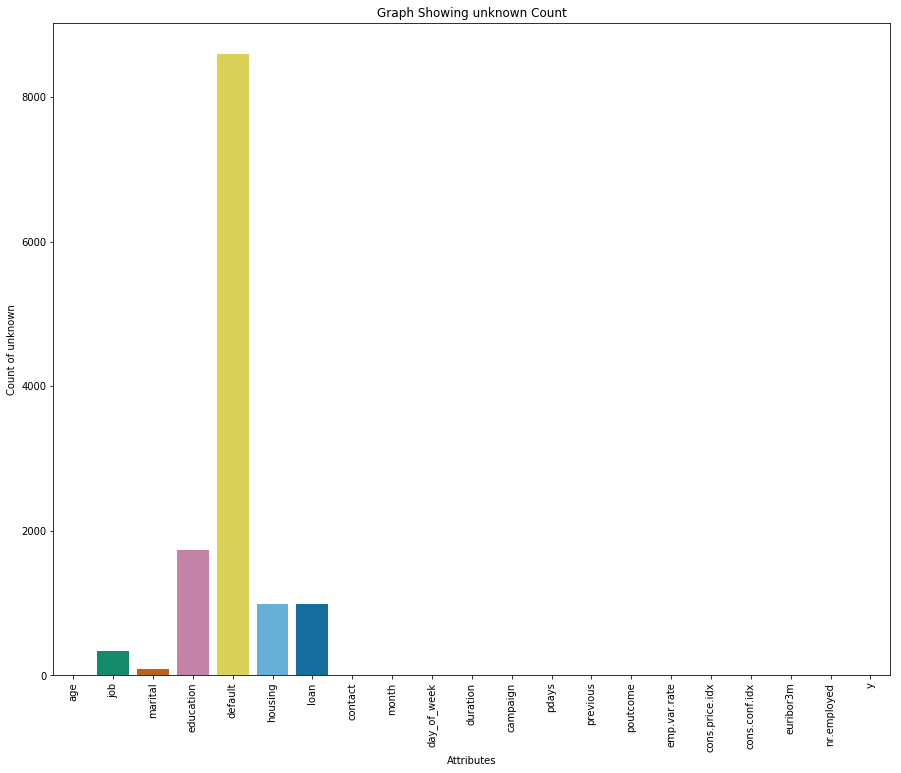

In [23]:
plt.figure(figsize=(15,12))
a = pd.DataFrame(bank[bank == 'unknown'].count().reset_index())
sns.barplot(x = 'index', y = 0, data = a, palette='colorblind')
plt.xticks(rotation = 'vertical')
plt.xlabel('Attributes')
plt.ylabel('Count of unknown')
plt.title('Graph Showing unknown Count')


plt.show()



In [24]:
# since default has huge amount of unknown. we ll drop and check the result

bank_x_wodefault = bank.drop(['y','default'], axis = 1)
#bank_y = bank['y']
#print(bank_x.shape, bank_y.shape)
bank_x_dummy = pd.get_dummies(bank_x_wodefault)
print(bank_x_dummy.shape)

xtrain, xtest, ytrain, ytest =  train_test_split(bank_x_dummy, bank_op, test_size = 0.2,random_state = 0)
print(xtrain.shape, ytrain.shape, xtest.shape,ytest.shape)

(41188, 60)
(32950, 60) (32950,) (8238, 60) (8238,)


In [25]:
model_rf = RandomForestClassifier()
model_rf.fit(xtrain,ytrain)

predict_rf = model_rf.predict(xtest)
predict_rf

accuracy_score(ytest, predict_rf)*100

91.01723719349356

In [26]:
#does not affect much.
#since random forest and adaboost gives the best result we ll do hyper tuning for them.
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier()
params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
params
tree_cv = GridSearchCV(rf_model, param_grid=params)
tree_cv.fit(xtrain,ytrain)
tree_cv.best_params_


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [27]:
model_rf = RandomForestClassifier(n_estimators=400, criterion='entropy')
#criterion = 'entropy', max_depth = 5,max_features= 'sqrt',n_estimators= 400
model_rf.fit(xtrain,ytrain)

predict_1 = model_rf.predict(xtest)
predict_1

predict_rf = pd.DataFrame({ 'predicted' : predict_1,
                            'actual'    : ytest})

#accuracy_score(ytest, predict_rf)*100


In [28]:
#checking sensitivity/spaceficity

#True Positive
tp_rf = predict_rf[(predict_rf['predicted']==1) & (predict_rf['actual']==1)].shape[0]
# True Negative
tn_rf = predict_rf[(predict_rf['predicted']==0)  & (predict_rf['actual']==0)].shape[0]
#False Postive
fp_rf = predict_rf[(predict_rf['predicted']==1) & (predict_rf['actual']==0)].shape[0]
#False Negative
fn_rf = predict_rf[(predict_rf['predicted']==0)  & (predict_rf['actual']==1)].shape[0]

print('True Positive %d' % tp_rf)
print('True Negative %d' % tn_rf)
print('False Positive %d' % fp_rf)
print('False Negative %d' % fn_rf)

acc_rf = (tp_rf + tn_rf) / (tp_rf + tn_rf + fp_rf + fn_rf)
print('Accuracy',acc_rf*100)

sensitivity_rf = tp_rf / (tp_rf + fn_rf)
print('Sensitivity',sensitivity_rf*100)

spec_rf = tn_rf/(fp_rf + tn_rf)
print('Specificity',spec_rf*100)

#sensitivity too low

True Positive 436
True Negative 7121
False Positive 198
False Negative 483
Accuracy 91.73343044428259
Sensitivity 47.442872687704025
Specificity 97.29471239240334


In [29]:
#### way 2
model     = RandomForestClassifier(n_estimators=300)
model.fit(xtrain,ytrain)
test_pred = model.predict(xtest)
confusion_matrix(ytest,test_pred,labels=[1,2])
tn,fp,fn,tp = confusion_matrix(ytest, test_pred).ravel()
sensitivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
#print(accuracy_score)
print(sensitivity*100)
print(specificity*100)
print(accuracy_score(ytest, test_pred)*100)
print(tn,fp,fn,tp)
print(classification_report(ytest,test_pred))

48.09575625680087
97.17174477387621
91.69701383831027
7112 207 477 442
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      7319
          1       0.68      0.48      0.56       919

avg / total       0.91      0.92      0.91      8238



In [30]:
#we ll hypertune probabiblity. for that first we need values
probs = pd.DataFrame(model.predict_proba(xtest),columns=['Neg_1', 'Pos_2'])
print(probs.head(10))
print(probs.shape)
for cut_off in np.linspace(0,1,22):
    print(cut_off)

      Neg_1     Pos_2
0  0.436667  0.563333
1  0.960000  0.040000
2  1.000000  0.000000
3  0.956667  0.043333
4  1.000000  0.000000
5  0.480000  0.520000
6  0.996667  0.003333
7  0.993333  0.006667
8  0.676667  0.323333
9  0.963333  0.036667
(8238, 2)
0.0
0.047619047619047616
0.09523809523809523
0.14285714285714285
0.19047619047619047
0.23809523809523808
0.2857142857142857
0.3333333333333333
0.38095238095238093
0.42857142857142855
0.47619047619047616
0.5238095238095237
0.5714285714285714
0.6190476190476191
0.6666666666666666
0.7142857142857142
0.7619047619047619
0.8095238095238095
0.8571428571428571
0.9047619047619047
0.9523809523809523
1.0


In [31]:
cut_off = 0.4
test_pred2  = probs['Pos_2'].apply(lambda v: 1 if v > cut_off else 0)
#confusion_matrix(test_y, test_pred2, labels=[1,2])
tn,fp,fn,tp = confusion_matrix(ytest, test_pred2).ravel()
sensitivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
print(specificity)
print(sensitivity)
print(tn,fp,fn,tp)
print(len(test_pred2))
print(len(ytest))


0.9475338160950949
0.6594124047878128
6935 384 313 606
8238
8238


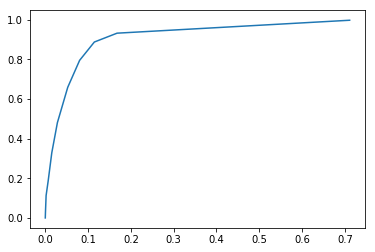

In [32]:
cut_offs = []
tpr      = []#true positive rate / sensitivity
fpr      = []#false positive rate/ specificity

for cut_off in np.linspace(0,1,11):
    test_pred2  = probs['Pos_2'].apply(lambda v: 1 if v > cut_off else 0)
    tn,fp,fn,tp = confusion_matrix(ytest, test_pred2, labels =[0,1]).ravel()
    sensitivity = (tp)/(tp+fn)
    specificity = (tn)/(tn+fp)
    cut_offs.append(cut_off)
    tpr.append(sensitivity)
    fpr.append(1-specificity)
#print(cut_offs)
#print(tpr)
#print(sensitivity)
#print(tn,fp,fn,tp)
#print(fpr)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)    

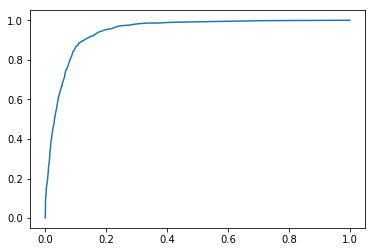

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr,cutoffs = roc_curve(ytest, probs['Pos_2'], pos_label=1)
plt.plot(fpr,tpr)

In [34]:
df_roc = pd.DataFrame({
    'cutoff':cutoffs,
    'fpr' : fpr,
    'tpr' : tpr,
    'specificity' : 1-fpr
})
df_roc

,cutoff,fpr,tpr,specificity
0,0.990000,0.000000,0.001088,1.000000
1,0.963333,0.000000,0.002176,1.000000
2,0.956667,0.000000,0.004353,1.000000
3,0.950000,0.000000,0.006529,1.000000
4,0.943333,0.000000,0.009793,1.000000
5,0.936667,0.000000,0.011970,1.000000
6,0.933333,0.000000,0.016322,1.000000
7,0.930000,0.000000,0.018498,1.000000
8,0.923333,0.000000,0.020675,1.000000
9,0.920000,0.000137,0.023939,0.999863


In [35]:
#we will select the cutoff with max value of youden index
df_roc['youden_index'] = df_roc['tpr'] + df_roc['specificity'] - 1
df_roc.sort_values(by='youden_index', ascending = False)

,cutoff,fpr,tpr,specificity,youden_index
212,0.193333,0.119415,0.894450,0.880585,0.775035
211,0.196667,0.117776,0.892274,0.882224,0.774499
206,0.213333,0.109305,0.883569,0.890695,0.774265
207,0.210000,0.110398,0.884657,0.889602,0.774260
210,0.200000,0.116409,0.890098,0.883591,0.773689
209,0.203333,0.114633,0.887922,0.885367,0.773289
214,0.183333,0.124880,0.897715,0.875120,0.772834
217,0.173333,0.129253,0.902067,0.870747,0.772815
208,0.206667,0.111901,0.884657,0.888099,0.772757
219,0.166667,0.132942,0.905332,0.867058,0.772390


In [36]:
cut_off = 0.176667
test_pred2  = probs['Pos_2'].apply(lambda v: 1 if v > cut_off else 0)
#confusion_matrix(test_y, test_pred2, labels=[1,2])
tn,fp,fn,tp = confusion_matrix(ytest, test_pred2).ravel()
sensitivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
print(specificity*100)
print(sensitivity*100)
print(tn,fp,fn,tp)
accuracy_score(ytest,test_pred2)*100

87.37532449788222
89.77149075081611
6395 924 94 825


87.64263170672494

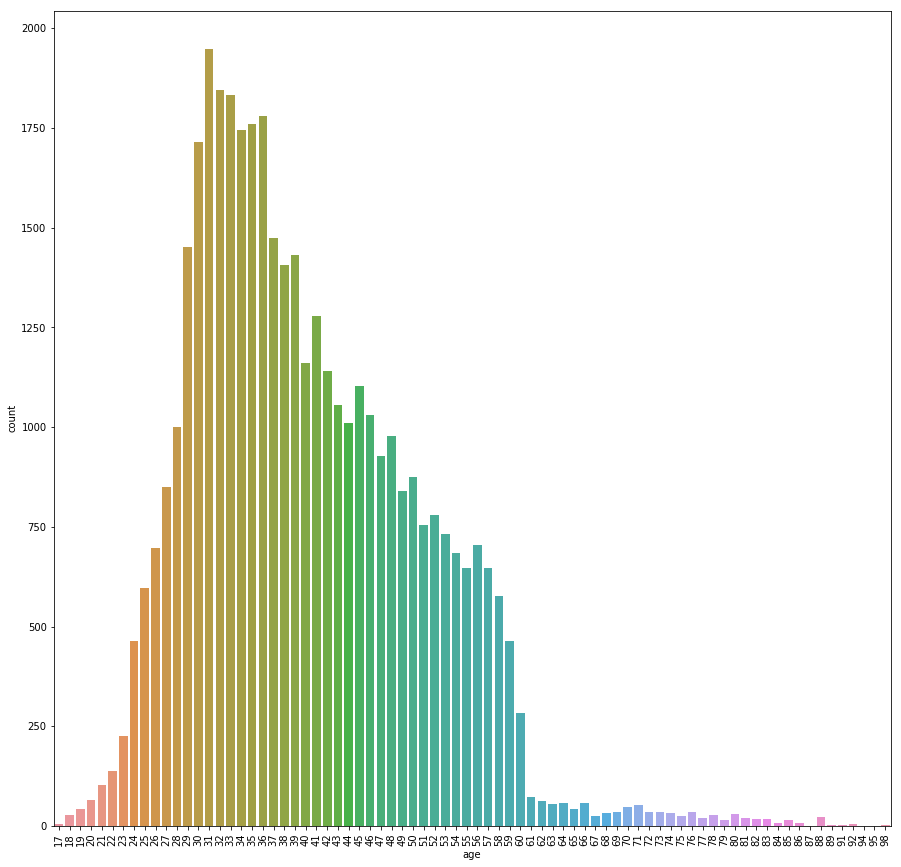

In [37]:
plt.figure(figsize=(15,15))
sns.countplot('age', data=bank)
plt.xticks(rotation = 'vertical')
plt.show()

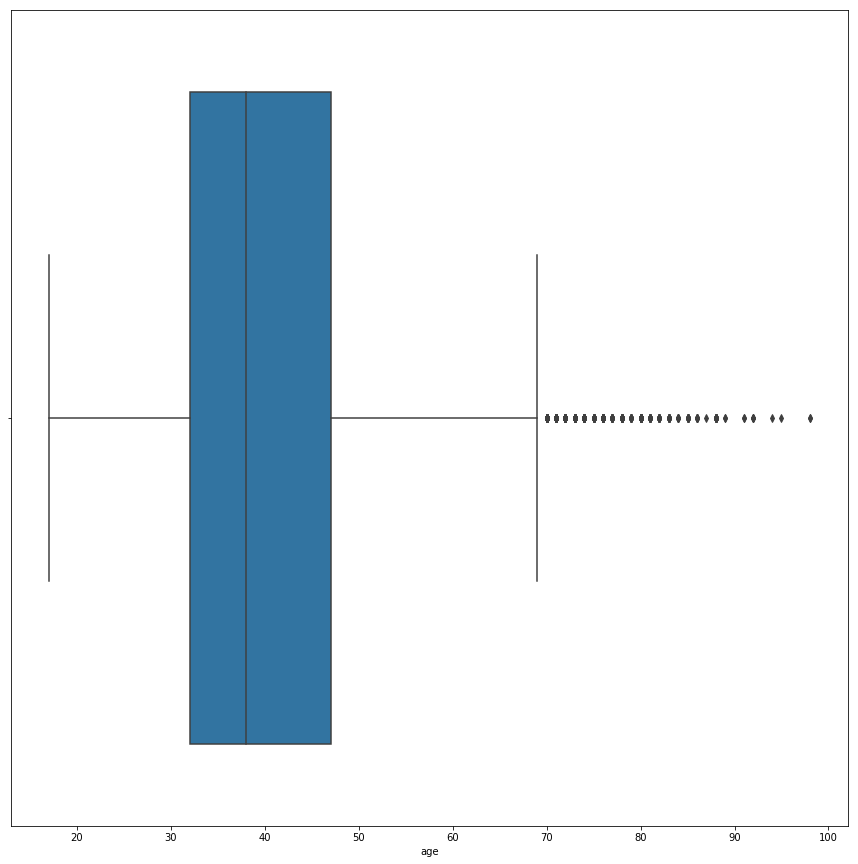

In [38]:
plt.figure(figsize=(15,15))
sns.boxplot('age', data=bank)
plt.show()

In [39]:
bank['bin'] = pd.cut(bank['age'], [0,10,20,30,40,50,60,70,80,90])

In [40]:
bank_x_woage = bank.drop(['y','default','age'], axis = 1)
#bank_y = bank['y']
#print(bank_x.shape, bank_y.shape)
bank_x_dummy = pd.get_dummies(bank_x_woage)
print(bank_x_dummy.shape)

xtrain, xtest, ytrain, ytest =  train_test_split(bank_x_dummy, bank_op, test_size = 0.2,random_state = 0)
print(xtrain.shape, ytrain.shape, xtest.shape,ytest.shape)

(41188, 68)
(32950, 68) (32950,) (8238, 68) (8238,)


In [41]:

model     = RandomForestClassifier(n_estimators=300)
model.fit(xtrain,ytrain)
test_pred = model.predict(xtest)
confusion_matrix(ytest,test_pred,labels=[1,2])
tn,fp,fn,tp = confusion_matrix(ytest, test_pred).ravel()
sensitivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
#print(accuracy_score)
print(sensitivity*100)
print(specificity*100)
print(accuracy_score(ytest, test_pred)*100)
print(tn,fp,fn,tp)
test_pred

48.313384113166485
97.15808170515098
91.70915270696771
7111 208 475 444


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
probs = pd.DataFrame(model.predict_proba(xtest),columns=['Neg_1', 'Pos_2'])
cut_off = 0.176667
test_pred2  = probs['Pos_2'].apply(lambda v: 1 if v > cut_off else 0)
#confusion_matrix(test_y, test_pred2, labels=[1,2])
tn,fp,fn,tp = confusion_matrix(ytest, test_pred2).ravel()
sensitivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
print(specificity*100)
print(sensitivity*100)
print(tn,fp,fn,tp)
accuracy_score(ytest,test_pred2)*100
print(classification_report(ytest, test_pred2))

87.55294439131028
89.98911860718172
6408 911 92 827
             precision    recall  f1-score   support

          0       0.99      0.88      0.93      7319
          1       0.48      0.90      0.62       919

avg / total       0.93      0.88      0.89      8238



In [43]:
checking_unknown_job = bank[bank['job'] == 'unknown']
print(checking_unknown_job.shape)
#checking_unknown = bank[((bank['job'] == 'unknown') & (bank['y'] == 'no'))]
#checking_unknown.shape
checking_unknown_job['y'].value_counts()/checking_unknown_job.shape[0]*100

(330, 22)


no     88.787879
yes    11.212121
Name: y, dtype: float64

In [44]:
edu = bank[bank['education'] == 'unknown']
print(edu.shape)
edu['y'].value_counts()/edu.shape[0]*100

(1731, 22)


no     85.499711
yes    14.500289
Name: y, dtype: float64

In [45]:
bank['y'].value_counts()/bank.shape[0]*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

In [46]:
bank.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 60]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 60]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(30, 40]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(30, 40]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 60]"
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(40, 50]"
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 60]"
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(40, 50]"
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(20, 30]"
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(20, 30]"


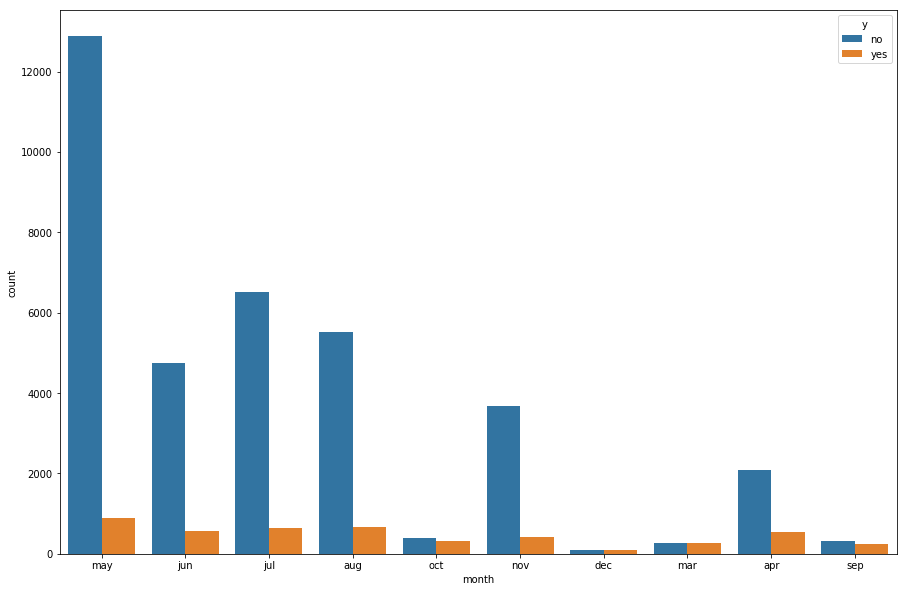

In [47]:
plt.figure(figsize=(15,10))
sns.countplot('month', data=bank, hue = 'y' )

In [48]:
bank_single  = bank[bank['marital'] == 'single']
print(bank_single.shape)
bank_married = bank[bank['marital'] == 'married']
print(bank_married.shape)
print(bank.shape)
print("single :", bank_single['y'].value_counts()/bank_single.shape[0]*100)
print("married :",bank_married['y'].value_counts()/bank_married.shape[0]*100)



(11568, 22)
(24928, 22)
(41188, 22)
single : no     85.995851
yes    14.004149
Name: y, dtype: float64
married : no     89.842747
yes    10.157253
Name: y, dtype: float64


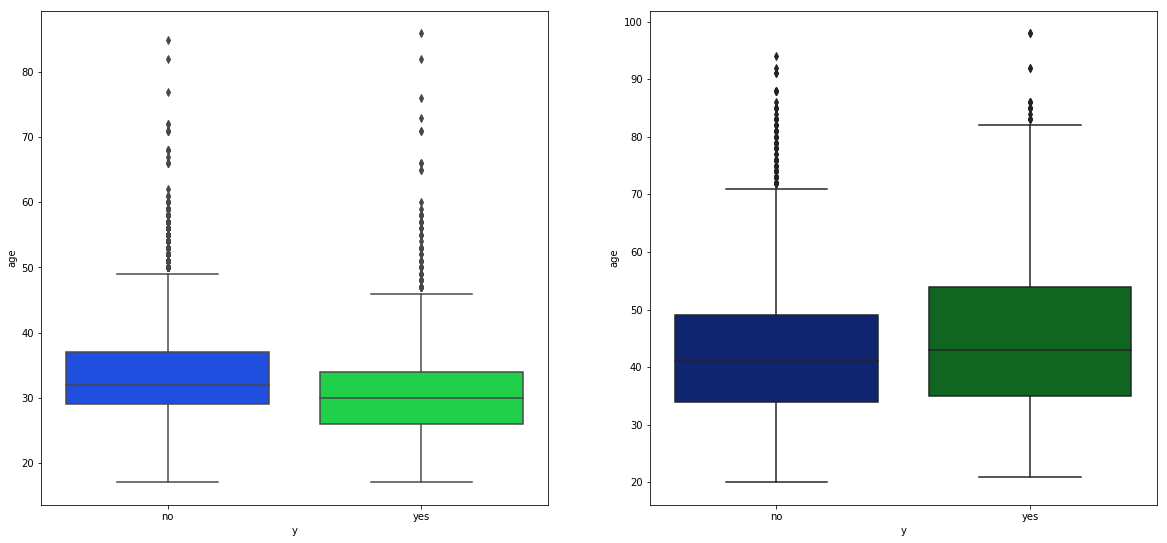

In [49]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(x = 'y', y = 'age', data=bank_single, palette='bright')
plt.subplot(2,2,2)
sns.boxplot(x = 'y', y = 'age', data=bank_married, palette='dark')
plt.show()

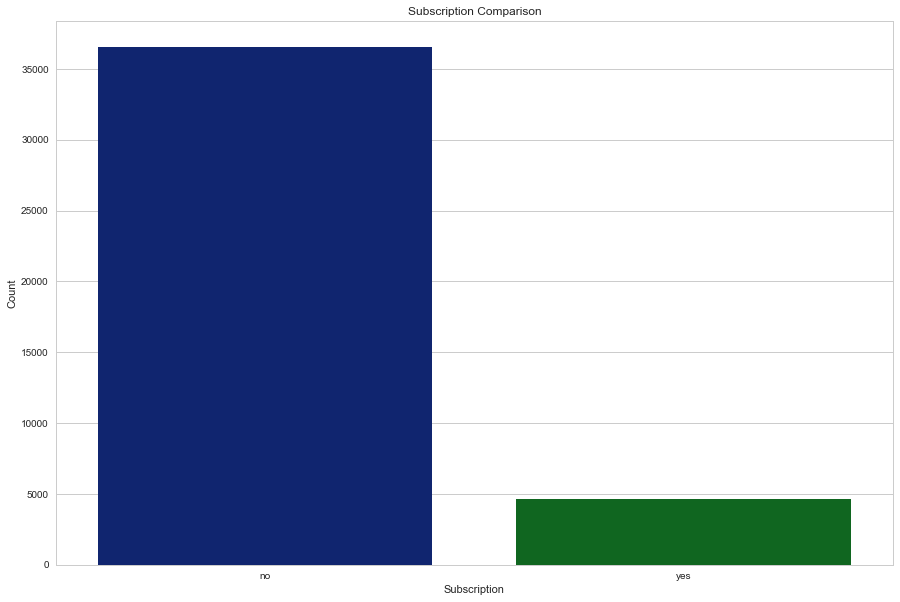

In [50]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.countplot('y', data = bank, palette='dark')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.title('Subscription Comparison')
plt.show()